# PyTorch-基本功能

## 教學目標

這份教學的目標是介紹 PyTorch，撰寫深度學習模型的函式庫。

## 適用對象

已經有基本的機器學習知識，且擁有 python、`numpy`、`matplotlib` 基礎的學生。

若沒有先學過 python，請參考 [python-入門語法](./python-入門語法.ipynb) 教學。

若沒有先學過 `numpy`，請參考 [numpy-基本功能](./numpy-基本功能.ipynb) 教學。

若沒有先學過 `matplotlib`，請參考 [matplotlib-資料視覺化](./matplotlib-資料視覺化.ipynb) 教學。

## 執行時間

本教學全部執行時間約為 4.376506090164185 秒。

|測試環境|名稱|
|-|-|
|主機板|X570 AORUS ELITE|
|處理器|AMD Ryzen 7 3700X 8-Core Processor|
|記憶體|Kingston KHX3200C16D4/16GX|
|硬碟|Seagate ST1000DM003-1ER1|
|顯示卡|GeForce RTX 2080|
|作業系統|Ubuntu 18.04 LTS|

## 大綱

- [簡介](#簡介)
- [安裝](#安裝)
- [張量宣告](#張量宣告)
- [張量取值](#張量取值)
- [張量運算](#張量運算)
- [創造張量](#創造張量)
- [高維張量運算](#高維張量運算)
- [維度運算](#維度運算)
- [使用 GPU 運算](#使用-GPU-運算)
- [深度學習](#深度學習)
- [練習](#練習)

## 簡介

根據 [PyTorch 官方網站](https://pytorch.org/)（v1.4）：

> PyTorch is an open source machine learning framework that accelerates the path from research prototyping to production deployment.
> 
> PyTorch 是一個開源的機器學習框架，能夠幫助加速從研究原型到商業應用的轉換過程。

![PyTorch usage statistics](https://thegradient.pub/content/images/2019/10/ratio_medium-1.png)

根據[統計](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/)，PyTorch 在各大機器學習會議使用率逐年上升，使用者選擇 PyTorch 的原因為：

- 簡單（Simplicity）
    - 使用 `python` 作為介面
    - 操作方法與 `numpy` 相似
- 好用的介面（Great API）
    - 沒有過多的抽象化
- 效能（Performance）

## 安裝

請參考 [PyTorch 官方網站](https://pytorch.org/get-started/locally/#start-locally)，並選擇適合的環境選項與安裝方法。

本教學使用 `pip` 安裝 `torch`，選項如下：

|選項|描述|選擇|
|-|-|-|
|PyTorch Build|請選**穩定版**避免未知錯誤|`Stable(1.4)`|
|Your OS|依照**作業系統**來選擇|`Linux`|
|Package|安裝 **PyTorch** 使用的方法|`Pip`|
|Language|當前執行 **Python** 版本|`Python 3.6`|
|CUDA|電腦上是否有 **GPU** 且支援 **CUDA 架構**|`10.1`|

得到以下安裝指令：

```sh
pip install torch torchvision
```

In [ ]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 匯入 PyTorch 套件
# 在 python 中的介面名稱為 torch
import torch

# 匯入 numpy 與 matplotlib
import numpy as np
import matplotlib.pyplot as plt

print((
    'PyTorch version {}\n' +
    'GPU-enabled installation? {}'
).format(
    # 確認 torch 的版本
    torch.__version__,        
    # 確認是否有 GPU 裝置
    torch.cuda.is_available() 
))

PyTorch version 2.0.0+cu118
GPU-enabled installation? True


## Torch Tensor
程式語言框架通常有其主要的資料型態，像是 numpy 中的 ndarray。在 PyTorch 內則是叫做 tensor（張量）的一種資料型態。PyTorch 的所有操作和 numpy 都很相似，但重要的是 tensor 支援 CUDA 的硬體加速（GPU），使得 GPU 深度學習變得簡單可行。tensor 可以在GPU/CPU上傳輸：只要使用 `tensor.cuda(device_id)`
即可以將 tensor 移動到第 `device_id` 個（0-indexed）的 GPU 核心上。或者 `tensor.cpu()`可以將 tensor 移動回到 CPU 上。另外一個更通用的方法是 `tensor.to(device)`。

--- 
## 額外補充
### 什麼是 GPU ？
GPU全稱為圖形處理器（Graphics Processing Unit），是一種專門進行繪圖運算工作的微處理器。儘管GPU在遊戲中以3D渲染而聞名，但GPU相較於「傳統的專為通用計算而設計的CPU，具有數百或數千個核心，經過優化，可並行運行大量計算，對運行深度學習和機器學習算法尤其有用。GPU允許某些計算機比傳統CPU上運行相同的計算速度快10-100倍。

### 什麼是CUDA？

CUDA全稱為計算統一設備架構（Compute Unified Device Architecture），是NVIDIA（輝達）創建的平行計算平臺和應用程序編程接口模型。CUDA 平臺是一個軟件層，可直接訪問GPU的虛擬指令集和並行計算元素，以執行計算內核。因此，如果我們想利用 GPU 加速運行深度學習算法，那麼 CUDA 就是一個不可或缺的中間層，它代替我們直接和GPU硬體打交道，並對外開放接口。而 PyTorch 則對這層接口再次進行封裝，以方便程式設計人員使用。

### 什麼是cuDNN？

cuDNN 全稱為 CUDA 深度神經網絡庫（CUDA Deep Neural Network library），是 NVIDIA 打造的針對深度神經網絡的加速庫，是一個用於深層神經網絡的 GPU 加速庫。如果你要使用 GPU 訓練模型，cuDNN 不是必須的，但一般會採用這個加速庫。

## 參考資料
- [知乎：什麼是張量？& 深度學習](https://zhuanlan.zhihu.com/p/48982978)
- [CUDA 入門, nvidia 公司官方網站](https://blogs.nvidia.com.tw/2020/10/27/cuda-refresher-getting-started-with-cuda/)
- [CUDA、cuDNN、pytorch 安装分析](https://blog.csdn.net/weixin_38481963/article/details/105313471) 
- [NQU Tensor 介紹 slides](https://www.nqu.edu.tw/upload/educsie/attachment/529fa35c91b055e7da3c8dc7a9bc975e.pdf)


## 張量宣告

在 `torch` 中陣列稱為張量（Tensor），創造張量的語法為 `torch.tensor([value1, value2, ...])`。

- 每個 `torch.Tensor` 都有不同的**數值型態屬性** `torch.Tensor.dtype`
    - 必須透過 `torch.Tensor.dtype` 取得，無法透過 `type()` 取得
- 可以指定型態
    - 透過參數 `dtype` 指定型態
    - 透過 `torch.LongTensor` 創造整數，預設為 `torch.int64`
    - 透過 `torch.FloatTensor` 創造浮點數，預設為 `torch.float32`

|`torch` 型態|`numpy` 型態|C 型態|範圍|
|-|-|-|-|
|`torch.int8`|`numpy.int8`|`int_8`|-128~127|
|`torch.int16`|`numpy.int16`|`int_16`|-32768~32767|
|`torch.int32`|`numpy.int32`|`int_32`|-2147483648~2147483647|
|`torch.int64`|`numpy.int64`|`int_64`|-9223372036854775808~9223372036854775807|
|`torch.float32`|`numpy.float32`|`float`||
|`torch.float64`|`numpy.float64`|`double`||

- 每個 `torch.Tensor` 都有**維度屬性** `torch.Size`
    - 呼叫 `torch.Tensor.size()` 來取得維度屬性
    - `torch.Tensor.size` 本質是 `tuple`
    - 張量維度愈高，`len(torch.Tensor.size)` 數字愈大
- 可以使用 `torch.Tensor.reshape` 或 `torch.Tensor.view` 進行維度變更
    - 變更後的維度必須要與變更前的維度乘積相同
    - 變更後的內容為 **shallow copy**

In [ ]:
# 張量宣告

# 宣告 Tensor 變數
t1 = torch.tensor([1, 2, 3])                           
# 輸出 Tensor
print(t1)                                              
# 輸出 True
print(type(t1) == torch.Tensor)                        
# 輸出 torch.int64
print(t1.dtype)                                        
print()

# 宣告 Tensor 變數
t2 = torch.tensor([1., 2., 3.])                        
# 輸出 Tensor
print(t2)                                              
# 輸出 True
print(type(t2) == torch.Tensor)                        
# 輸出 torch.float32
print(t2.dtype)                                        
print()

# 各種 dtype
# 輸出 torch.int8
print(torch.tensor([1, 2], dtype=torch.int8).dtype)    
# 輸出 torch.int16
print(torch.tensor([1, 2], dtype=torch.int16).dtype)   
# 輸出 torch.int32
print(torch.tensor([1, 2], dtype=torch.int32).dtype)   
# 輸出 torch.int64
print(torch.tensor([1, 2], dtype=torch.int64).dtype)   
# 輸出 torch.float32
print(torch.tensor([1, 2], dtype=torch.float32).dtype) 
# 輸出 torch.float64
print(torch.tensor([1, 2], dtype=torch.float64).dtype) 
print()

# 宣告 LongTensor 變數
t3 = torch.LongTensor([1, 2, 3])                       
# 輸出 torch.int64
print(t3.dtype)                                        

# 宣告 FloatTensor 變數
t4 = torch.FloatTensor([1, 2, 3])                      
# 輸出 torch.float32
print(t4.dtype)                                        

tensor([1, 2, 3])
True
torch.int64

tensor([1., 2., 3.])
True
torch.float32

torch.int8
torch.int16
torch.int32
torch.int64
torch.float32
torch.float64

torch.int64
torch.float32


In [ ]:
a = torch.arange(4.)
print(a)
resa = torch.reshape(a, (2, 2))
print(resa)

tensor([0., 1., 2., 3.])
tensor([[0., 1.],
        [2., 3.]])


## view 和 reshape 
- 參考[官方網站連結](https://pytorch.org/docs/stable/tensor_view.html)，PyTorch allows a tensor to be a View of an existing tensor. `View` tensor shares the same underlying data with its base tensor. Supporting View avoids explicit data copy, thus allows us to do fast and memory efficient reshaping, slicing and element-wise operations.
- ``torch.view(*shape)->Tensor``: Returns a new tensor with the same data as the self tensor but of a different shape. The returned tensor shares the same data and must have the same number of elements, but may have a different size. For a tensor to be viewed, the new view size must be compatible with its original size and stride, i.e., each new view dimension must either be a subspace of an original dimension, or only span across original dimensions $d,d+1,…,d+k$ that satisfy the following contiguity-like condition that $\forall i = d, ... d+k-1$
$$
stride[i] = stride[i+1] \times size[i+1]
$$

- ``torch.reshape(*shape)->Tensor``: 
Returns a tensor with the same data and number of elements as self but with the specified shape. This method returns a view if shape is compatible with the current shape. See ``torch.Tensor.view()`` on when it is possible to return a view.

 

In [ ]:
# size 屬性

# 宣告 Tensor 變數
t5 = torch.tensor([               
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12],
])

# 輸出 Tensor
print(t5)                         
# 輸出 t5.size (4, 3)
print(t5.size())                  
print()

# 重新更改 t5.size
print("reshaped to (3,4):", t5.reshape(3, 4))           
# 輸出更改後的維度 (3, 4)
print(t5.reshape(3, 4).size())    
print()
# 重新更改 t5.size
print(t5.view(3, 4))              
# 輸出更改後的維度 (3, 4)
print(t5.view(3, 4).size())       
print()

# 重新更改 t5.size
print(t5.reshape(2, 6))           
# 輸出更改後的維度 (2, 6)
print(t5.reshape(2, 6).size())    
print()
# 重新更改 t5.size
print(t5.view(2, 6))              
# 輸出更改後的維度 (2, 6)
print(t5.view(2, 6).size())       
print()

# 重新更改 t5.size
print(t5.reshape(2, 3, 2))        
# 輸出更改後的維度 (2, 3, 2)
print(t5.reshape(2, 3, 2).size()) 
print()
# 重新更改 t5.size
print(t5.view(2, 3, 2))           
# 輸出更改後的維度 (2, 3, 2)
print(t5.view(2, 3, 2).size())    

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
torch.Size([4, 3])

reshaped to (3,4): tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
torch.Size([3, 4])

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
torch.Size([3, 4])

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])
torch.Size([2, 6])

tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])
torch.Size([2, 6])

tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])
torch.Size([2, 3, 2])

tensor([[[ 1,  2],
         [ 3,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])
torch.Size([2, 3, 2])


## 張量取值

與 `numpy` 語法概念相似。

- 使用 `torch.Tensor[位置]` 來取得 `torch.Tensor` 中指定位置的值
    - 若為**多個維度**的張量，則使用 `tuple` 來取得指定位置的值
    - 若位置為**負數**，則等同於反向取得指定位置的值
    - 取出的值會以 `torch.Tensor.dtype` 的形式保留
- 使用 `torch.Tensor[起始位置:結束位置]` 來取得 `torch.Tensor` 中的部分**連續**值
    - **包含起始位置**的值
    - **不包含結束位置**的值
    - 取出的值會以 `torch.Tensor` 的形式保留
- 使用 `torch.Tensor[iterable]`（例如 `list`, `tuple` 等）來取得**多個** `torch.Tensor` 中的值
    - 取出的值會以 `torch.Tensor` 的形式保留
- 使用判斷式來取得 `torch.Tensor` 中的部份資料
    - 經由判斷式所得結果也為 `torch.Tensor`
    - 判斷式所得結果之 `torch.Tensor.dtype` 為**布林值** `bool`（`True` 或 `False`）
    - 取出的值會以 `torch.Tensor` 的形式保留

In [ ]:
# 張量取值

# 宣告 Tensor 變數
t6 = torch.tensor([ 
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
])

# 輸出張量 t6 中的第 0 個位置的值 [0, 1, 2]
print(t6[0])        
# 輸出張量 t6 中的第 1 個位置的值 [3, 4, 5]
print(t6[1])        
# 輸出張量 t6 中的第 1 個位置的值 [6, 7, 8]
print(t6[2])        
# 輸出張量 t6 中的第 -2 個位置的值 [6, 7, 8]
print(t6[-2])       
# 輸出張量 t6 中的第 -1 個位置的值 [9, 10, 11]
print(t6[-1])       
print()

# 輸出張量 t6 中的第 [0, 0] 個位置的值 0
print(t6[0, 0])     
# 輸出張量 t6 中的第 [0, 1] 個位置的值 1
print(t6[0, 1])     
# 輸出張量 t6 中的第 [1, 1] 個位置的值 4
print(t6[1, 1])     
# 輸出張量 t6 中的第 [1, 2] 個位置的值 5
print(t6[1, 2])     
# 輸出張量 t6 中的第 [-1, -1] 個位置的值 11
print(t6[-1, -1])   
# 輸出張量 t6 中的第 [-1, -2] 個位置的值 10
print(t6[-1, -2])   
# 輸出張量 t6 中的第 [-2, -1] 個位置的值 8
print(t6[-2, -1])   

tensor([0, 1, 2])
tensor([3, 4, 5])
tensor([6, 7, 8])
tensor([6, 7, 8])
tensor([ 9, 10, 11])

tensor(0)
tensor(1)
tensor(4)
tensor(5)
tensor(11)
tensor(10)
tensor(8)


In [ ]:
# 取連續值

# 宣告 Tensor 變數
t7 = torch.tensor([ 
    0, 10, 20, 30, 40, 
    50, 60, 70, 80, 90
])

# 輸出張量 t7 位置 0, 1, 2 但是不含位置 3 的值 [0, 10, 20]
print(t7[0:3])      
# 輸出張量 t7 位置 7, 8, 9 的值 [70, 80, 90]
print(t7[7:])       
# 輸出張量 t7 位置 0, 1 但是不含位置 2 的值 [0, 10]
print(t7[:2])       
# 輸出張量 t7 所有位置的值 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
print(t7[:])        
print()

# 宣告 Tensor 變數
t8 = torch.tensor([ 
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11],
])

# 輸出張量 t8 位置 0, 1, 但是不含位置 2 的值 [[0, 1, 2], [3, 4, 5]]
print(t8[0:2])      
print()

# 輸出張量 t8 位置 1, 2, 3 的值 [[3, 4, 5], [6, 7, 8], [9, 10, 11]]
print(t8[1:])       
print()

# 輸出張量 t8 位置 0 但是不含位置 1 的值 [[0, 1, 2]]
print(t8[:1])       
print()

# 輸出張量 t8 位置 0 但是不含位置 1 的值 [[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
print(t8[:])        

tensor([ 0, 10, 20])
tensor([70, 80, 90])
tensor([ 0, 10])
tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

tensor([[0, 1, 2],
        [3, 4, 5]])

tensor([[ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

tensor([[0, 1, 2]])

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
# 使用 iterable 取得多個值

# 宣告 Tensor 變數
t9 = torch.tensor([        
    0, 10, 20, 30, 40, 
    50, 60, 70, 80, 90
])

# 輸出張量 t9 中偶數位置的值 [0, 20, 40, 60, 80]
print(t9[[0, 2, 4, 6, 8]]) 
print()
# 輸出張量 t9 中奇數位置的值 [10, 30, 50, 70, 90]
print(t9[[1, 3, 5, 7, 9]]) 
print()

# 宣告 Tensor 變數
t10 = torch.tensor([       
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# 輸出張量 t10[0] 與 t10[1] 的值 [[1, 2, 3, 4] [5, 6, 7, 8]]
print(t10[[0, 1]])         
print()
# 輸出張量 t10[0, 2] 與 t10[1, 3] 的值 [3, 8]
print(t10[[0, 1], [2, 3]]) 

tensor([ 0, 20, 40, 60, 80])

tensor([10, 30, 50, 70, 90])

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

tensor([3, 8])


In [ ]:
# 判斷式取值

# 宣告 Tensor 變數
t11 = torch.tensor([      
    0, 10, 20, 30, 40, 
    50, 60, 70, 80, 90
])

# 輸出每個值是否大於 50 的 `torch.Tensor`
print(t11 > 50)           
# 輸出 torch.bool
print((t11 > 50).dtype)   
# 輸出大於 50 的值 [60, 70, 80, 90]
print(t11[t11 > 50])      
# 輸出除以 20 餘數為 0 的值 [0, 20, 40, 60, 80]
print(t11[t11 % 20 == 0]) 

tensor([False, False, False, False, False, False,  True,  True,  True,  True])
torch.bool
tensor([60, 70, 80, 90])
tensor([ 0, 20, 40, 60, 80])


## 張量運算

### 純量運算（Scalar Operation）

對張量內所有數值與單一純量（Scalar）進行相同計算。

|符號|意義|
|-|-|
|`torch.Tensor + scalar`|張量中的每個數值加上 `scalar`|
|`torch.Tensor - scalar`|張量中的每個數值減去 `scalar`|
|`torch.Tensor * scalar`|張量中的每個數值乘上 `scalar`|
|`torch.Tensor / scalar`|張量中的每個數值除以 `scalar`|
|`torch.Tensor // scalar`|張量中的每個數值除以 `scalar` 所得之商|
|`torch.Tensor % scalar`|張量中的每個數值除以 `scalar` 所得之餘數|
|`torch.Tensor ** scalar`|張量中的每個數值取 `scalar` 次方|

### 個別數值運算（Element-wise Operation）

若兩個張量想要進行運算，則兩個張量的**維度必須相同**（即兩張量之 `torch.size()` 相同）。

|符號|意義|
|-|-|
|`A + B`|張量 `A` 中的每個數值加上張量 `B` 中相同位置的數值|
|`A - B`|張量 `A` 中的每個數值減去張量 `B` 中相同位置的數值|
|`A * B`|張量 `A` 中的每個數值乘上張量 `B` 中相同位置的數值|
|`A / B`|張量 `A` 中的每個數值除以張量 `B` 中相同位置的數值|
|`A // B`|張量 `A` 中的每個數值除以張量 `B` 中相同位置的數值所得之商|
|`A % B`|張量 `A` 中的每個數值除以張量 `B` 中相同位置的數值所得之餘數|
|`A ** B`|張量 `A` 中的每個數值取張量 `B` 中相同位置的數值之次方|

### 個別數值函數運算（Element-wise Functional Operation）

若想對張量中的**所有數值**進行**相同函數運算**，必須透過 `torch` 提供的介面進行。

|函數|意義|
|-|-|
|`torch.sin`|張量中的每個數值 $x$ 計算 $\sin(x)$|
|`torch.cos`|張量中的每個數值 $x$ 計算 $\cos(x)$|
|`torch.tan`|張量中的每個數值 $x$ 計算 $\tan(x)$|
|`torch.exp`|張量中的每個數值 $x$ 計算 $e^{x}$|
|`torch.log`|張量中的每個數值 $x$ 計算 $\log x$
|`torch.ceil`|張量中的每個數值 $x$ 計算 $\left\lceil x \right\rceil$
|`torch.floor`|張量中的每個數值 $x$ 計算 $\left\lfloor x \right\rfloor$

In [ ]:
# 純量運算(Scalar Operation)

# 宣告 Tensor 變數
t12 = torch.tensor([ 
    [0, 10, 20],
    [30, 40, 50],
    [60, 70, 80],
    [90, 100, 110],
])

# 輸出張量 t12
print(t12)           
print()
# 對張量 t12 所有數值加 5
print(t12 + 5)       
print()
# 對張量 t12 所有數值減 4
print(t12 - 4)       
print()
# 對張量 t12 所有數值乘 3
print(t12 * 3)       
print()
# 對張量 t12 所有數值除以 10
print(t12 / 10)      
print()
# 對張量 t12 所有數值除以 10 所得整數部份
print(t12 // 10)     
print()
# 對張量 t12 所有數值除以 7 得到餘數
print(t12 % 7)       
print()
# 對張量 t12 所有數值取 2 次方
print(t12 ** 2)      

tensor([[  0,  10,  20],
        [ 30,  40,  50],
        [ 60,  70,  80],
        [ 90, 100, 110]])

tensor([[  5,  15,  25],
        [ 35,  45,  55],
        [ 65,  75,  85],
        [ 95, 105, 115]])

tensor([[ -4,   6,  16],
        [ 26,  36,  46],
        [ 56,  66,  76],
        [ 86,  96, 106]])

tensor([[  0,  30,  60],
        [ 90, 120, 150],
        [180, 210, 240],
        [270, 300, 330]])

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

tensor([[0, 3, 6],
        [2, 5, 1],
        [4, 0, 3],
        [6, 2, 5]])

tensor([[    0,   100,   400],
        [  900,  1600,  2500],
        [ 3600,  4900,  6400],
        [ 8100, 10000, 12100]])


In [ ]:
# 個別數值運算

# 宣告 Tensor 變數
t13 = torch.tensor([ 
    [1, 2, 3],
    [4, 5, 6]
])

# 宣告 Tensor 變數
t14 = torch.tensor([ 
    [6, 5, 4],
    [3, 2, 1]
])

# 張量相加
print(t13 + t14)     
print()
# 張量相減
print(t13 - t14)     
print()    

tensor([[7, 7, 7],
        [7, 7, 7]])

tensor([[-5, -3, -1],
        [ 1,  3,  5]])




**Q: 有辦法做這個效果嗎？**

```
F(v) = (f(v_1),f(v_2),f(v_3),…,f(v_n))
```
Ans: 沒辦法提供一個可以直接輸入 f() 的函數，如果 f 能夠被 rewritten into torch.cos(), torch.sin() 等函數的組合就可以平行做 element-wise operation。
- [Can we do an element-wise any function similar to map()](https://discuss.pytorch.org/t/apply-a-function-similar-to-map-on-a-tensor/51088)


In [ ]:
# 個別數值函數運算

# 宣告 Tensor 變數
t15 = torch.tensor([               
    [0,     np.pi / 4,     np.pi / 2,     np.pi / 4 * 3],
    [np.pi, np.pi / 4 * 5, np.pi / 2 * 3, np.pi / 4 * 7]
])

# 張量所有數值計算 sine
print(torch.sin(t15))              
print()
# 張量所有數值計算 cosine
print(torch.cos(t15))              
print()
# 張量所有數值計算 tangent
print(torch.tan(t15))              
print()

# 宣告 Tensor 變數
t16 = torch.tensor([               
    [1., 2., 3.],
    [4., 5., 6.]
])

# 張量所有數值取指數
print(torch.exp(t16))              
print()
# 張量所有數值取對數
print(torch.log(t16))              
print()
# 張量所有數值取對數後無條件進位
print(torch.ceil(torch.log(t16)))  
print()
# 張量所有數值取對數後無條件捨去
print(torch.floor(torch.log(t16))) 

tensor([[ 0.0000e+00,  7.0711e-01,  1.0000e+00,  7.0711e-01],
        [-8.7423e-08, -7.0711e-01, -1.0000e+00, -7.0711e-01]])

tensor([[ 1.0000e+00,  7.0711e-01, -4.3711e-08, -7.0711e-01],
        [-1.0000e+00, -7.0711e-01,  1.1925e-08,  7.0711e-01]])

tensor([[ 0.0000e+00,  1.0000e+00, -2.2877e+07, -1.0000e+00],
        [ 8.7423e-08,  1.0000e+00, -8.3858e+07, -1.0000e+00]])

tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5981, 148.4132, 403.4288]])

tensor([[0.0000, 0.6931, 1.0986],
        [1.3863, 1.6094, 1.7918]])

tensor([[0., 1., 2.],
        [2., 2., 2.]])

tensor([[0., 0., 1.],
        [1., 1., 1.]])


In [ ]:

# # 宣告 Tensor 變數
# t13 = torch.tensor([ 
#     [1, 2, 3],
#     [4, 5, 6]
# ])

# # 宣告 Tensor 變數
# t14 = torch.tensor([ 
#     [6, 5, 4],
#     [3, 2, 1]
# ])


# 張量相乘
print(t13 * t14)     
print()
# 張量相除
print(t13 / t14)     
print()
# 張量相除取商
print(t13 // t14)    
print()
# 張量相除取餘數
print(t13 % t14)     
print()
# 張量 A 取張量 B 次方
print(t13 ** t14)
# res[0][0] = A[0][0]**B[0][0]
# res[0][1] = A[0][1]**B[0][1]
# ...
# res[i][j] = A[i][j]**B[i][j]
# 0 <= i < 2
# 0 <= j < 3 

tensor([[ 6, 10, 12],
        [12, 10,  6]])

tensor([[0.1667, 0.4000, 0.7500],
        [1.3333, 2.5000, 6.0000]])

tensor([[0, 0, 0],
        [1, 2, 6]])

tensor([[1, 2, 3],
        [1, 1, 0]])

tensor([[ 1, 32, 81],
        [64, 25,  6]])


In [ ]:
a = torch.tensor([[2], [1]])
print(a.size())         # a shape: (2, 1) 
b = torch.randn((2,5))  # b shape: (2, 5)

try:
  print(y:=a**b)
  # a, b 雖然 size mismatch，但適用張量自動擴充的條件3
  print(y.shape)
except Exception as e:
  print(e)

torch.Size([2, 1])
tensor([[0.7449, 0.8160, 3.8002, 0.2895, 1.2484],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])
torch.Size([2, 5])


In [ ]:
a = torch.tensor([[2,5], [1,4]])
print(a.size())         # a shape: (2, 2) 
b = torch.randn((2,5))  # b shape: (2, 5)
print(b.size())
try:
  print(y:=a**b) 
  print(y.shape)
except Exception as e:
  print('Error Message:', e)
  # 從最後一個維度開始比較，如果有任何維度無法滿足條件，則得到 error 

torch.Size([2, 2])
torch.Size([2, 5])
Error Message: The size of tensor a (2) must match the size of tensor b (5) at non-singleton dimension 1



###🚧 **張量自動擴充（Broadcasting)**

若張量 `A` 的維度為 `(a1, a2, ..., an)`（即 `A.size() == (a1, a2, ..., an)`），則張量 `B` 在滿足以下其中一種條件時即可與張量 `A` 進行運算：

- 張量 `B` 與張量 `A` 維度完全相同（即 `B.size() == (a1, a2, ..., an)`）
- 張量 `B` 為純量（即 `B.size() == (1,)`）
- 張量 `B` 的維度為 `(b1, b2, ..., bn)`，若 `ai != bi`，則 `ai == 1` 或 `bi == 1`
    - 從**最後**一個維度開始比較
    - 如果有任何一個維度無法滿足前述需求，則會得到 `ValueError`

In [ ]:
# 張量自動擴充

# 宣告 Tensor 變數
t17 = torch.tensor([ 
    [
        [1, 2],
        [3, 4],
        [5, 6],
    ],
    [
        [7, 8],
        [9 ,10],
        [11, 12]
    ]
])

# 宣告 Tensor 變數
t18 = torch.tensor([ 
    [
        [1],
        [1],
        [1]
    ],
    [
        [2],
        [2],
        [2]
    ],
])

# 輸出張量 t17 維度
print(t17.size())    
# 輸出張量 t18 維度
print(t18.size())    
print()   

torch.Size([2, 3, 2])
torch.Size([2, 3, 1])



In [ ]:
# 張量 t17 與張量 t17 維度相同，所以可以直接運算
print(t17 + t17)     
print()
# 張量 t17 與張量 t18 可以擴充成相同維度，所以可以運算
print(t17 + t18)  

tensor([[[ 2,  4],
         [ 6,  8],
         [10, 12]],

        [[14, 16],
         [18, 20],
         [22, 24]]])

tensor([[[ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 9, 10],
         [11, 12],
         [13, 14]]])


## 創造張量

### 賦值（Assignment）

使用 `=` 賦與指定位置數值。可以使用 `iterable` 一次指定多個位置。

|符號|意義|
|-|-|
|`=`|賦值|
|`+=`|進行加法後賦值|
|`-=`|進行減法後賦值|
|`*=`|進行乘法後賦值|

### 隨機（Random）

創造出新的張量，所有數值皆為**隨機決定**，必須**事先指定張量維度**。

|函數|意義|用途|備註|
|-|-|-|-|
|`torch.empty`|創造隨機未初始化張量|已確認維度，尚未確認數值|無法控制隨機|
|`torch.rand`|創造隨機浮點數張量，並符合均勻分佈|需要隨機浮點數時|透過均勻分佈決定亂數，範圍介於 0 到 1之間|
|`torch.randn`|創造隨機浮點數張量，並符合常態分佈|需要符合常態分佈的隨機浮點數時|透過常態分佈決定亂數，$\mu = 0$ 且 $\sigma = 1$|
|`torch.randint`|創造隨機整數張量|需要隨機整數時|透過均勻分佈決定亂數，可以控制隨機範圍|

### 指定數值（Filled In）

**快速創造**擁有特定數值的張量，必須**事先指定張量維度**。

|函數|意義|用途|
|-|-|-|
|`torch.zeros`|創造指定維度大小的張量，所有數值初始化為 0|快速初始化|
|`torch.zeros_like`|複製指定張量的維度，創造出新的張量，所有數值初始化為 0|複製張量並初始化|
|`torch.ones`|創造指定維度大小的張量，所有數值初始化為 1|快速初始化|
|`torch.ones_like`|複製指定張量的維度，創造出新的張量，所有數值初始化為 1|複製張量並初始化|
|`torch.full`|創造指定維度大小的張量，所有數值初始化為指定數值|快速初始化|
|`torch.full_like`|複製指定張量的維度，創造出新的張量，所有數值初始化為指定數值|複製張量並初始化|
|`torch.eye`|創造單位矩陣|矩陣微分|
|`torch.arange`|列舉數字|等同於 `list(range(value))`|

### 從 numpy 轉換

可以使用 `torch.tensor()` 將 `numpy.ndarray` 轉換成 `torch.Tensor`；
使用 `torch.numpy()` 將 `torch.Tensor` 轉換成 `numpy.ndarray`。

In [ ]:
# 賦值

# 宣告 Tensor 變數
t19 = torch.tensor([     
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
print(t19)
print()

# 將張量 t19 位置 0 的所有數值改成 1995
t19[0] = 1995            
print(t19)
print()

# 將張量 t19 位置 [0, 1] 的所有數值改成 10
t19[0, 1] = 10           
print(t19)
print()

# 將張量 t19 位置 [2, 1] 與 [0, 2] 的所有數值改成 12
t19[[2, 0], [1, 2]] = 12 
print(t19)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

tensor([[1995, 1995, 1995],
        [   4,    5,    6],
        [   7,    8,    9],
        [  10,   11,   12]])

tensor([[1995,   10, 1995],
        [   4,    5,    6],
        [   7,    8,    9],
        [  10,   11,   12]])

tensor([[1995,   10,   12],
        [   4,    5,    6],
        [   7,   12,    9],
        [  10,   11,   12]])


In [ ]:
# 宣告 Tensor 變數
t20 = torch.tensor([      
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
print(t20)
print()

# 將張量 t20 位置 0 的所有數值加上 1995
t20[0] += 1995            
print(t20)
print()

# 將張量 t20 位置 [0, 1] 的所有數值減掉 10
t20[0, 1] -= 10           
print(t20)
print()

# 將張量 t20 位置 [2, 1] 與 [0, 2] 的所有數值乘上 12
t20[[2, 0], [1, 2]] *= 12 

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

tensor([[1996, 1997, 1998],
        [   4,    5,    6],
        [   7,    8,    9],
        [  10,   11,   12]])

tensor([[1996, 1987, 1998],
        [   4,    5,    6],
        [   7,    8,    9],
        [  10,   11,   12]])



In [ ]:
# 隨機

# 隨機創造維度為 (2, 3) 的張量，數值為無法控制範圍的浮點
print(torch.empty((2, 3)))               
print()                                  

# 隨機創造維度為 (2, 3) 的張量，數值為介於 0 到 1 之間的浮點
print(torch.rand(2, 3))                  
print()                                  

# 隨機創造維度為 (2, 3) 的張量，數值為介於 0 到 10 之間的浮點
print(torch.rand(2, 3) * 10)             
print()                                  

# 隨機創造維度為 (2, 3) 的張量，數值為介於 -5 到 5 之間的浮點數
print(torch.rand(2, 3) * 10 - 5)         
print()                                  

# 隨機創造維度為 (2, 3) 的張量，分佈為平均值為 0 標準差為 1 的常態分佈
print(torch.randn(2, 3))                 
print()                                  

# 隨機創造維度為 (2, 3) 的張量，數值為介於 -5 到 5 之間的浮點數
print(torch.randint(-5, 5, size=(2, 3))) 
                                         

tensor([[7.6424e-35, 0.0000e+00, 7.6233e-35],
        [0.0000e+00, 7.9050e+31, 5.5515e-08]])

tensor([[0.9792, 0.7769, 0.0042],
        [0.0970, 0.0852, 0.2350]])

tensor([[7.0244, 0.0352, 8.6536],
        [3.2376, 2.8807, 7.6093]])

tensor([[-1.8597,  2.7890, -1.1310],
        [-1.3648, -1.8921, -0.2046]])

tensor([[ 0.3973,  1.0959, -0.1656],
        [ 0.6208, -0.1334,  0.9573]])

tensor([[ 3, -2, -5],
        [ 3, -5,  0]])


In [ ]:
# 指定數值
# 創造維度為 (2, 3) 的張量，並初始化為 0
print(torch.zeros((2, 3)))      
print()

# 宣告 Tensor 變數
t21 = torch.tensor([            
    [1, 2, 3],
    [4, 5, 6],
])
# 複製張量 t21 的維度，創造出新的張量，並初始化為 0
print(torch.zeros_like(t21))    
print()

# 創造維度為 (3, 4) 的張量，並初始化為 1
print(torch.ones((3, 4)))       
print()

# 宣告 Tensor 變數
t22 = torch.tensor([            
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
# 複製張量 t22 的維度，創造出新的張量，並初始化為 1
print(torch.ones_like(t22))     
print()

# 創造維度為 (5, 6) 的張量，並初始化為 420
print(torch.full((5, 6), 420))  
print()

# 宣告 Tensor 變數
t23 = torch.tensor([            
    [1, 2, 3, 4, 5, 6],
    [7, 8, 9, 10, 11, 12],
    [13, 14, 15, 16, 17, 18],
    [19, 20, 21, 22, 23, 24],
    [25, 26, 27, 28, 29, 30]
])
# 複製張量 t23 的維度，創造出新的張量，並初始化為 69
print(torch.full_like(t23, 69)) 

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[0, 0, 0],
        [0, 0, 0]])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

tensor([[420, 420, 420, 420, 420, 420],
        [420, 420, 420, 420, 420, 420],
        [420, 420, 420, 420, 420, 420],
        [420, 420, 420, 420, 420, 420],
        [420, 420, 420, 420, 420, 420]])

tensor([[69, 69, 69, 69, 69, 69],
        [69, 69, 69, 69, 69, 69],
        [69, 69, 69, 69, 69, 69],
        [69, 69, 69, 69, 69, 69],
        [69, 69, 69, 69, 69, 69]])


In [ ]:
# 創造 3x3 單位矩陣
print(torch.eye(3))           
print()

# 從 0 列舉至 10，但不包含 10
print(torch.arange(10))       
print()

# 從 6 列舉至 9，但不包含 9
print(torch.arange(6, 9))     
print()

# 從 4 遞增至 20，但不包含 20，每次遞增 7
print(torch.arange(4, 20, 7)) 

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([6, 7, 8])

tensor([ 4, 11, 18])


In [ ]:
# 從 numpy 轉換

# 宣告 ndarray 變數
arr1 = np.array([1., 2., 3.]) 
# 將 numpy.ndarray 轉換為 torch.Tensor
t24 = torch.tensor(arr1)      
# 將 torch.Tensor 轉換為 numpy.ndarray
arr2 = t24.numpy()            

print((
    'original numpy.ndarray: {}, dtype: {}\n' + 
    'converted torch.Tensor: {}, dtype: {}\n' +
    'converted numpy.ndarray: {}, dtype: {}'
).format(
    arr1, arr1.dtype,
    t24, t24.dtype,
    arr2, arr2.dtype
))

original numpy.ndarray: [1. 2. 3.], dtype: float64
converted torch.Tensor: tensor([1., 2., 3.], dtype=torch.float64), dtype: torch.float64
converted numpy.ndarray: [1. 2. 3.], dtype: float64


## 高維張量運算

矩陣等同於是維度為 2 的張量。
而高維度的張量運算等同於**固定大部分的維度**，只使用**其中的兩個維度進行計算**。

### 張量乘法（Tensor Multiplication）

令 $A$ 與 $B$ 為兩張量，$A.\text{size}() = (a_1, a_2, ..., a_{n - 1}, a_n)$, $B.\text{size}() = (b_1, b_2, ..., b_{n - 1}, b_n)$。定義 $A \times B$ 如下：

$$
\begin{align*}
a_i &= b_i \forall i \in \{1, \dots, n - 2\} \\
a_n &= b_{n - 1} \\
(A \times B).\text{size}() &= (d_1, d_2, \dots, d_{n - 2}, a_{n - 1}, b_n) \\
&, \text{where } d_i = a_i = b_i \forall i \in \{1, 2, \dots, n - 2\} \\
(A \times B)_{d_1, d_2, \dots, d_{n - 2}, i, j} &=
\begin{cases}
\sum_{k = 1}^{b_{n - 1}} A_{i, k} \times B_{k, j} & \text{if } n = 2 \\
\sum_{k = 1}^{b_{n - 1}} A_{d_1, d_2, \dots, d_{n - 2}, i, k} \times B_{d_1, d_2, \dots, d_{n - 2}, k, j} & \text{if } n > 2
\end{cases} \\
&, \forall i \in \{1, \dots, a_1\}, j \in \{1, \dots, b_2\}
\end{align*}
$$

例如：以 $A.\text{size}() = (5, 4, 3)$ 與 $B.\text{size}() = (5, 3, 2)$ 來說，$(A \times B).\text{size}() = (5, 4, 2)$。

例如：以 $A.\text{size}() = (1995, 10, 12, 5, 4, 3)$ 與 $B.\text{size}() = (1995, 10, 12, 5, 3, 2)$ 來說，$(A \times B).\text{size}() = (1995, 10, 12, 5, 4, 2)$。

在 `torch` 中張量乘法為 `torch.matmul(A, B)`。

### 張量轉置（Tensor Transpose）

令 $A$ 兩張量，$A.\text{size}() = (a_1, a_2, ..., a_{n - 1}, a_n)$。定義 $A^{\top}$ 如下：

$$
\begin{align*}
A^{\top} &= (A_{a_1, a_2, \dots, a_{n - 2}, a_{n - 1}, a_n})^{\top} \\
&= A_{a_1, a_2, \dots, a_{n - 2}, a_n, a_{n - 1}}
\end{align*}
$$

即交換張量 $A$ 的最後兩個維度。若想要指定不同的維度 $i, j$ 進行轉置，則定義 $A^{\top_{i, j}}$ 如下：

$$
\begin{align*}
A^{\top_{i, j}} &= (A_{a_1, a_2, \dots, a_i, \dots, a_j, \dots, a_n})^{\top_i, j} \\
&= A_{a_1, a_2, \dots, a_j, \dots, a_i, \dots, a_n}
\end{align*}
$$

例如：以 $A.\text{size}() = (5, 4, 3)$ 來說，$A^{\top_{1, 2}}.\text{size}() = (5, 3, 4)$。

例如：以 $A.\text{size}() = (1995, 10, 12, 5, 4, 3)$ 來說，$A^{\top_{3, 4}}.\text{size}() = (1995, 10, 12, 4, 5, 3)$。

在 `torch` 中張量轉置為 `torch.transpose(A, i, j)`。

In [ ]:
# 張量乘法

# 宣告 Tensor 變數
t25 = torch.ones(5, 4, 3)    
# 宣告 Tensor 變數
t26 = torch.ones(5, 3, 2)    
# 進行張量乘法
t27 = torch.matmul(t25, t26) 

# 輸出張量 t25 的維度
print(t25.size())            
# 輸出張量 t26 的維度
print(t26.size())            
# 輸出張量 t27 的維度
print(t27.size())            

torch.Size([5, 4, 3])
torch.Size([5, 3, 2])
torch.Size([5, 4, 2])


In [ ]:
# 張量轉置

# 宣告 Tensor 變數
t28 = torch.ones(5, 4, 3)                

# 輸出轉置維度 1 與 2 後的維度
print(torch.transpose(t28, 1, 2).size()) 
# 輸出轉置維度 1 與 2 後的維度
print(t28.transpose(1, 2).size())        

# 輸出轉置維度 0 與 2 後的維度
print(torch.transpose(t28, 0, 2).size()) 
# 輸出轉置維度 0 與 2 後的維度
print(t28.transpose(0, 2).size())        

torch.Size([5, 3, 4])
torch.Size([5, 3, 4])
torch.Size([3, 4, 5])
torch.Size([3, 4, 5])


## 維度運算

### 降維函數（Dimension Decreasing Function）

以下函數將會使**輸出**張量維度**小於輸入**張量維度。
在機器學習中你幾乎必定會用到 `torch.argmax`。
![](https://www.researchgate.net/publication/326914586/figure/fig1/AS:657671334150145@1533812473734/Proposed-neural-network-classifier-with-softmax-output-function-and-a-bias-unit.png)

|函數|意義|
|-|-|
|`torch.sum`|將所有數值相加|
|`torch.max`|取出所有數值中最大者|
|`torch.min`|取出所有數值中最小者|
|`torch.argmax`|取出所有數值中最大者的位置|
|`torch.argmin`|取出所有數值中最小者的位置|
|`torch.mean`|取出所有數值的平均值|
|`torch.var`|取出所有數值的變異數|
|`torch.std`|取出所有數值的標準差|
|`torch.squeeze`|移除數字為 1 的維度|

### 增維函數（Dimension Increasing Function）

以下函數將會使**輸出**張量維度**大於輸入**張量維度。

|函數|意義|
|-|-|
|`torch.cat`|串接多個相同維度的張量|
|`torch.unsqueeze`|在指定的維度間增加 1 維度|

In [ ]:
# 降維函數

# 宣告 Tensor 變數
t29 = torch.tensor([            
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# 將張量 t29 中所有值相加
print(torch.sum(t29))           
# 將張量 t29 中所有值相加
print(t29.sum())                

# 將張量 t29 中依照維度 0 將所有值相加
print(torch.sum(t29, dim=0))    
# 將張量 t29 中依照維度 0 將所有值相加
print(t29.sum(dim=0))           
# 將張量 t29 中依照維度 1 將所有值相加
print(torch.sum(t29, dim=1))    
# 將張量 t29 中依照維度 1 將所有值相加
print(t29.sum(dim=1))           

# 找出張量 t29 中最大值
print(torch.max(t29))          
# 找出張量 t29 中最大值
print(t29.max())                
print()

# 依照維度 0 找出張量 t29 中最大值，並回傳最大值與對應位置
print(torch.max(t29, dim=0))    
print()                         
# 依照維度 0 找出張量 t29 中最大值，並回傳最大值與對應位置
print(t29.max(dim=0))           
print()                         
# 依照維度 0 找出張量 t29 中最大值
print(torch.max(t29, dim=0)[0]) 
# 依照維度 0 找出張量 t29 中最大值位置
print(torch.max(t29, dim=0)[1]) 
print()

# 找出張量 t29 中最小值
print(torch.min(t29))           
# 找出張量 t29 中最小值
print(t29.min())                
print()

# 依照維度 1 找出張量 t29 中最小值，並回傳最小值與對應位置
print(torch.min(t29, dim=1))    
print()                         
# 依照維度 1 找出張量 t29 中最小值，並回傳最小值與對應位置
print(t29.min(dim=1))           
print()                         
# 依照維度 1 找出張量 t29 中最小值
print(torch.min(t29, dim=1)[0]) 
# 依照維度 1 找出張量 t29 中最小值位置
print(torch.min(t29, dim=1)[1]) 

tensor(78)
tensor(78)
tensor([15, 18, 21, 24])
tensor([15, 18, 21, 24])
tensor([10, 26, 42])
tensor([10, 26, 42])
tensor(12)
tensor(12)

torch.return_types.max(
values=tensor([ 9, 10, 11, 12]),
indices=tensor([2, 2, 2, 2]))

torch.return_types.max(
values=tensor([ 9, 10, 11, 12]),
indices=tensor([2, 2, 2, 2]))

tensor([ 9, 10, 11, 12])
tensor([2, 2, 2, 2])

tensor(1)
tensor(1)

torch.return_types.min(
values=tensor([1, 5, 9]),
indices=tensor([0, 0, 0]))

torch.return_types.min(
values=tensor([1, 5, 9]),
indices=tensor([0, 0, 0]))

tensor([1, 5, 9])
tensor([0, 0, 0])


In [ ]:
# 宣告 Tensor 變數
t30 = torch.tensor([            
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# 找出張量 t30 中最大值的位置
print(torch.argmax(t30))        
# 找出張量 t30 中最大值的位置
print(t30.argmax())             

# 依照維度 0 找出張量 t30 中最大值的位置
print(torch.argmax(t30, dim=0)) 
# 依照維度 0 找出張量 t30 中最大值的位置
print(t30.argmax(dim=0))        
# 依照維度 1 找出張量 t30 中最大值的位置
print(torch.argmax(t30, dim=1)) 
# 依照維度 1 找出張量 t30 中最大值的位置
print(t30.argmax(dim=1))        

# 找出張量 t30 中最小值的位置
print(torch.argmin(t30))        
# 找出張量 t30 中最小值的位置
print(t30.argmin())             

# 依照維度 0 找出張量 t30 中最小值的位置
print(torch.argmin(t30, dim=0)) 
# 依照維度 0 找出張量 t30 中最小值的位置
print(t30.argmin(dim=0))        
# 依照維度 1 找出張量 t30 中最小值的位置
print(torch.argmin(t30, dim=1)) 
# 依照維度 1 找出張量 t30 中最小值的位置
print(t30.argmin(dim=1))        

tensor(11)
tensor(11)
tensor([2, 2, 2, 2])
tensor([2, 2, 2, 2])
tensor([3, 3, 3])
tensor([3, 3, 3])
tensor(0)
tensor(0)
tensor([0, 0, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 0])
tensor([0, 0, 0])


In [ ]:
# 宣告 Tensor 變數
t31 = torch.tensor([            
    [1., 2., 3., 4.],
    [5., 6., 7., 8.],
    [9., 10., 11., 12.]
])

# 計算張量 t31 中所有值的平均數
print(torch.mean(t31))         
# 計算張量 t31 中所有值的平均數
print(t31.mean())              

# 依照維度 0 計算張量 t31 中所有值的平均數
print(torch.mean(t31, axis=0)) 
# 依照維度 0 計算張量 t31 中所有值的平均數
print(t31.mean(axis=0))        
# 依照維度 1 計算張量 t31 中所有值的平均數
print(torch.mean(t31, axis=1)) 
# 依照維度 1 計算張量 t31 中所有值的平均數
print(t31.mean(axis=1))        

# 計算張量 t31 中所有值的變異數
print(torch.var(t31))          
# 計算張量 t31 中所有值的變異數
print(t31.var())               

# 依照維度 0 計算張量 t31 中所有值的變異數
print(torch.var(t31, axis=0))  
# 依照維度 0 計算張量 t31 中所有值的變異數
print(t31.var(axis=0))         
# 依照維度 1 計算張量 t31 中所有值的變異數
print(torch.var(t31, axis=1))  
# 依照維度 1 計算張量 t31 中所有值的變異數
print(t31.var(axis=1))         

# 計算張量 t31 中所有值的標準差
print(torch.std(t31))          
# 計算張量 t31 中所有值的標準差
print(t31.std())               

# 依照維度 0 計算張量 t31 中所有值的標準差
print(torch.std(t31, axis=0))  
# 依照維度 0 計算張量 t31 中所有值的標準差
print(t31.std(axis=0))         
# 依照維度 1 計算張量 t31 中所有值的標準差
print(torch.std(t31, axis=1))  
# 依照維度 1 計算張量 t31 中所有值的標準差
print(t31.std(axis=1))         

tensor(6.5000)
tensor(6.5000)
tensor([5., 6., 7., 8.])
tensor([5., 6., 7., 8.])
tensor([ 2.5000,  6.5000, 10.5000])
tensor([ 2.5000,  6.5000, 10.5000])
tensor(13.)
tensor(13.)
tensor([16., 16., 16., 16.])
tensor([16., 16., 16., 16.])
tensor([1.6667, 1.6667, 1.6667])
tensor([1.6667, 1.6667, 1.6667])
tensor(3.6056)
tensor(3.6056)
tensor([4., 4., 4., 4.])
tensor([4., 4., 4., 4.])
tensor([1.2910, 1.2910, 1.2910])
tensor([1.2910, 1.2910, 1.2910])


In [ ]:
# 宣告 Tensor 變數
t32 = torch.tensor([        
    [1, 2, 3]
])

# 移除張量 t32 中多餘的維度
t32_sq = torch.squeeze(t32) 

# 輸出張量 t32
print(t32)                  
# 輸出張量 t32 的維度
print(t32.size())           
# 輸出移除維度後的張量 t32
print(t32_sq)               
# 輸出移除維度後張量 t32 的維度
print(t32_sq.size())        

tensor([[1, 2, 3]])
torch.Size([1, 3])
tensor([1, 2, 3])
torch.Size([3])


In [ ]:
# 增維函數

# 宣告 Tensor 變數
t33 = torch.tensor([                  
    [1, 2, 3]
])

# 串接多個張量 t33
t33_cat = torch.cat([                 
    t33,
    t33,
    t33,
    t33
]) 

# 輸出串接後的張量 t33_cat
print(t33_cat)                        
# 輸出串接後的張量 t33_cat 維度
print(t33_cat.size())                 

# 宣告 Tensor 變數
t34 = torch.tensor([                  
    [1, 2, 3],
    [4, 5, 6]
])

print(t34)
print(t34.size())

# 對張量 t34 維度 0 增加 1 維
t34_usq = torch.unsqueeze(t34, dim=0) 

# 輸出張量 t34 維度 0 增加 1 維後的結果
print(t34_usq)                        
# 輸出張量 t34 維度 0 增加 1 維後的維度
print(t34_usq.size())                 

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
torch.Size([4, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
tensor([[[1, 2, 3],
         [4, 5, 6]]])
torch.Size([1, 2, 3])


## 使用 GPU 運算

上述的所有教學都是在 CPU 上進行運算，而大多數的深度學習框架都會提供操作 GPU 的介面幫助平型化運算。
而 `torch` 與大部分的深度學習框架相同，使用 Nvidia 開發的 CUDA（Compute Unified Device Architecture）幫助使用 GPU 進行深度學習的運算（cuDNN）。

使用 CUDA 操作平型化運算的流程為：

1. 宣告 GPU 運算所需要佔用的記憶體（`cudaMalloc`）
2. 定義每個平型化運算節點的運算內容
3. 在主記憶體上創造資料（`malloc`）
4. 將資料搬移至 GPU 的記憶體（`cudaMemcpy`）
5. 每個節點獨立運算
6. 將計算結果搬回至主記憶體（`memcpy`）
7. 釋放 GPU 的記憶體（`cudaFree`）

而在 `torch` 中將以上流程簡化成以下兩種方法

- 宣告 `torch.Tensor` 變數時使用 `device='cuda:0'` 參數將變數宣告於 GPU 記憶體第0顆（0-indexed）。
- 對已經創造於主記憶體的 `torch.Tensor` 變數使用 `torch.to('cuda:0')` 搬移至 GPU 記憶體第0顆（0-indexed）。
```python
torch.tensor([1., 2., 3.], device='cuda:0') # 使用 device 參數將變數宣告於 GPU 記憶體
torch.tensor([1., 2., 3.]).to('cuda:0')     # 使用 to 將變數搬移至 GPU 記憶體
```

宣告於 GPU 或搬移至 GPU 後，之後所有的運算便會在 GPU 上進行。

In [ ]:
# 使用 GPU 運算

if torch.cuda.is_available():
    # 使用 device 參數創造張量於 GPU 上
    t35 = torch.tensor([1., 2., 3.], device='cuda:0') 
else:
    # 如果不支援 cuda 則出現 error
    print('torch not compiled with CUDA enabled')     
    t35 = None
    
# 輸出張量 t35
print(t35)                                            

tensor([1., 2., 3.], device='cuda:0')


In [ ]:
if torch.cuda.is_available():
    # 使用 to 將張量搬移至 GPU 上
    t36 = torch.tensor([1., 2., 3.]).to('cuda:0') 
else:
    # 如果不支援 cuda 則出現 error
    print('torch not compiled with CUDA enabled') 
    t36 = None
    
# 輸出張量 t36
print(t36)

tensor([1., 2., 3.], device='cuda:0')


In [ ]:
# 如果有可用 GPU 時採用 GPU cuda:0
if torch.cuda.is_available():                   
    device = torch.device('cuda:0')
# 若無 GPU 可用則使用 CPU
else:                                           
    device = torch.device('cpu')

print(device)

# 根據 device 創造張量
t37 = torch.tensor([1., 2., 3.], device=device) 
# 使用 to 搬移張量至指定的裝置
t38 = torch.tensor([1., 2., 3.]).to(device)     

# 輸出張量 t37
print(t37)                                      
# 輸出張量 t38
print(t38)                                      

cuda:0
tensor([1., 2., 3.], device='cuda:0')
tensor([1., 2., 3.], device='cuda:0')


## 深度學習

![Deep Learning](https://miro.medium.com/max/1000/1*51D0MqtqHu3h2vTE5oJ-7g.png)
![Deep Learning vs. Machine Learning](https://learn.microsoft.com/zh-tw/azure/machine-learning/media/concept-deep-learning-vs-machine-learning/ai-vs-machine-learning-vs-deep-learning.png)
## 深度學習要幹嘛？
上課教的 SVM, Bayes 等等的模型算是 （傳統）Machine Learning 的範疇，比較偏向建立於統計的假設的數學統計模型。而深度學習則是機器學習內的一個子集合（subset），他是以類神經網路來模擬人類大腦的神經元之間的互動。


使用 `torch` 進行深度學習主要包含以下步驟：

1. 將資料轉換成 `torch.Tensor`，使用 Dataset 和 Dataloader 包裝管理資料。
2. 使用 `torch.nn` 建立深度學習模型架構。
3. 從 `torch.optim` 選擇最佳化工具。
4. 選擇目標函數。
5. 訓練深度學習模型（train）。
6. 測試深度學習模型（test, inference）。

### 資料集

1. 使用 `torch.utils.data.Dataset` 將資料集轉換成 `torch.Tensor`
2. 使用 `torch.utils.data.DataLoader` 將資料集以批次（mini-batch）取出
3.（Optional）額外定義 `collate_fn` 將抽樣的資料整理成固定的格式



In [ ]:
# 資料集

# 匯入資料集 base class
from torch.utils.data import Dataset 

# 繼承 base class 創造資料集
class MyDataset(Dataset):            
    # 給予資料集大小，並隨機創造資料
    def __init__(self, size):        
        self.x = torch.rand(size) * 2 - 1
        self.y = 2 * self.x ** 2 + 3 * self.x + 17
        
    # 定義總資料數
    def __len__(self):               
        return len(self.x)
    
    # 定義取出單一資料的方法
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
# 創造資料集
my_dataset = MyDataset(10)           

# 取得總資料數
print(len(my_dataset))               
# 取出單一資料
print(my_dataset[0])                 

10
(tensor(-0.5519), tensor(15.9535))


In [ ]:
# 匯入資料集抽樣工具
from torch.utils.data import DataLoader 

# 定義格式化的方法
def collate_fn(batch):                  
    x_list = []
    y_list = []
    
    for x, y in batch:
        # 將每個 x 轉換成 [x]
        x_list.append([x])              
        # 將每個 y 轉換成 [y]
        y_list.append([y])              
        
    # 最終回傳的維度為 [(batch_size, features), (batch_size, labels)]
    return [torch.tensor(x_list), torch.tensor(y_list)] 

# 創造 DataLoader 實例
my_data_loader = DataLoader(            
    # 對資料集 my_dataset 進行抽樣
    my_dataset,                         
    # 設定每次抽樣的數量
    batch_size=3,                       
    # 設定隨機抽樣
    shuffle=True,                       
    # 指定格式化的方法
    collate_fn=collate_fn               
)

# 透過 my_data_loader 對資料集 my_dataset 進行抽樣
for data in my_data_loader:             
    # 輸出抽樣結果
    print(data)                         
    print()

[tensor([[-0.1877],
        [ 0.0055],
        [-0.5519]]), tensor([[16.5073],
        [17.0166],
        [15.9535]])]

[tensor([[-0.3740],
        [ 0.8185],
        [ 0.3821]]), tensor([[16.1577],
        [20.7951],
        [18.4385]])]

[tensor([[ 0.3836],
        [-0.1347],
        [ 0.3989]]), tensor([[18.4453],
        [16.6323],
        [18.5150]])]

[tensor([[-0.4692]]), tensor([[16.0327]])]



### 建立模型

可以使用 `torch.nn` 現成的模型進行深度學習，常用的包含：

|模型介面|名稱|常見用途|
|-|-|-|
|`torch.nn.Linear`|線性層（Linear Layer）|轉換特徵|
|`torch.nn.Embedding`|嵌入層（Embedding Layer）|學習特徵向量表達法|
|`torch.nn.Conv1d`|1 維卷積層（1-Dimensional Convolution Layer）|抽取連續資料區域特徵|
|`torch.nn.Conv2d`|2 維卷積層（2-Dimensional Convolution Layer）|抽取平面圖片區域特徵|
|`torch.nn.Conv3d`|3 維卷積層（3-Dimensional Convolution Layer）|抽取立體圖片區域特徵|
|`torch.nn.RNN`|循環神經網路（Recurrent Neural Network）|壓縮動態長度文字|
|`torch.nn.LSTM`|長短期記憶神經網路（Long Short-Term Memory）|有效壓縮動態長度文字|
|`torch.nn.Transformer`|多面向自我注意力機制模型（Multi-Head Self-Attention）|機器翻譯|

如果需要使用深度學習模型（即多個模型串接），則必須透過繼承 `torch.nn.Module` 來定義**模型結構**與**運算流程**：
使用 `nn.Module` 定義模型時必須要記得以下規則：

- 在類別方法 `__init__` 中定義模型結構
    - 必須要執行 `super(MyModel, self).__init__()`
    - 為什麼需要：[colab link](https://colab.research.google.com/drive/1LL1RVaoGoGYE68HCaMOEVSCR8bEPgqqc?usp=sharing)
- 必須透過定義類別方法 `forward` 才能定義計算流程


### 啟動函數（Activation Functions）

若模型需要啟動函數，可以使用 `torch.nn.functional` 中事先定義好的啟動函數：
常見的啟動函數包含：

|啟動函數|名稱|定義|數值範圍|
|-|-|-|-|
|`torch.nn.functional.relu`|ReLU|$$f(x_i) = \max(0, x_i)$$|$$\mathbb{R}^+$$|
|`torch.nn.functional.softmax`|Softmax|$$f(x_i) = \frac{e^{x_i}}{\sum_{j = 0}^n e^{x_j}}$$|$$[0, 1]$$|
|`torch.nn.functional.sigmoid`|Sigmoid|$$f(x_i) = \frac{1}{1 + e^{-x_i}}$$|$$[0, 1]$$|
|`torch.nn.functional.tanh`|Hyperbolic Tangent|$$f(x_i) = \frac{e^{x_i} - e^{-x_i}}{e^{x_i} + e^{-x_i}}$$|$$[-1, 1]$$|

In [ ]:
# 建立模型

# 匯入神經網路模型
import torch.nn as nn                   
# 匯入啟動函數
import torch.nn.functional as F         

# 模型需要繼承自 nn.Module
class MyModel(nn.Module):               
    # 定義模型結構, 輸入層維度, 隱藏層維度, 輸出層維度
    def __init__(self,                  
                 in_dim,                
                 hid_dim,               
                 out_dim):              

        # 繼承 nn.Module 所有屬性
        super(MyModel, self).__init__() 
        
        # 創造線性層 self.layer1
        self.layer1 = nn.Linear(        
            # 設定線性層輸入維度
            in_features=in_dim,         
            # 設定線性層輸出維度
            out_features=hid_dim        
        )
        # 創造線性層 self.layer2
        self.layer2 = nn.Linear(        
            # 設定線性層輸入維度
            in_features=hid_dim,        
            # 設定線性層輸出維度
            out_features=out_dim        
        )
        
    # 定義運算流程
    def forward(self, batch_x):         
        # 使用線性層 self.layer1 輸入 batch_x 計算得到 h
        h = self.layer1(batch_x)        
        # 使用 ReLU 啟動函數輸入 h 得到 a
        a = F.relu(h)                   
        # 使用線性層 self.layer2 輸入 a 計算得到 y
        y = self.layer2(a)              
        # 輸出 y
        return y                        
    
# 創造 MyModel 模型實例
my_model = MyModel(                     
    # 設定輸入層維度
    in_dim=1,                           
    # 設定隱藏層維度
    hid_dim=10,                         
    # 設定輸出層維度
    out_dim=1                           
)

# 透過 my_data_loader 對資料集 my_dataset 進行抽樣
for batch_x, batch_y in my_data_loader: 
    print(batch_x)
    print(batch_y)
    # 自動呼叫 forward 計算 batch_x 得到 pred_y
    pred_y = my_model(batch_x)          
    print(pred_y)

tensor([[-0.1877],
        [-0.1347],
        [-0.5519]])
tensor([[16.5073],
        [16.6323],
        [15.9535]])
tensor([[-0.1087],
        [-0.0957],
        [-0.1984]], grad_fn=<AddmmBackward0>)
tensor([[-0.4692],
        [-0.3740],
        [ 0.8185]])
tensor([[16.0327],
        [16.1577],
        [20.7951]])
tensor([[-0.1836],
        [-0.1561],
        [-0.0068]], grad_fn=<AddmmBackward0>)
tensor([[0.3821],
        [0.3836],
        [0.0055]])
tensor([[18.4385],
        [18.4453],
        [17.0166]])
tensor([[ 0.0247],
        [ 0.0246],
        [-0.0616]], grad_fn=<AddmmBackward0>)
tensor([[0.3989]])
tensor([[18.5150]])
tensor([[0.0237]], grad_fn=<AddmmBackward0>)


### 目標函數（Objective Functions）

使用 `torch.nn` 中事先定義好的目標函數進行模型最佳化，計算模型預測結果與標記訓練資料的誤差值，並透過向後傳播（Back Propagation）演算法取得相對於誤差值的梯度（Gradient）：

```python
# 匯入神經網路模型
import torch.nn as nn             

# 創造均方誤差計算工具
criterion = nn.MSELoss()          

# 計算 batch_x 得到 pred_y
pred_y = my_model(batch_x)        
# 計算 pred_y 與 batch_y 的均方誤差
loss = criterion(pred_y, batch_y) 

# 使用向後傳播計算梯度
loss.backward()                   
```

常見的目標函數包含：

|目標函數|名稱|
|-|-|
|`torch.nn.MSELoss`|均方誤差（Mean Square Error）|
|`torch.nn.CrossEntropyLoss`|交叉熵（Cross Entropy）|
|`torch.nn.BCELoss`|二元交叉熵（Binary Cross Entropy）|
|`torch.nn.NLLLoss`|負對數似然（Negative Log Likelihood）|

In [ ]:
# 目標函數

# 創造均方誤差計算工具
criterion = nn.MSELoss()                

# 透過 my_data_loader 對資料集 my_dataset 進行抽樣
for batch_x, batch_y in my_data_loader: 
    
    # 自動呼叫 forward 計算 batch_x 得到 pred_y
    pred_y = my_model(batch_x)          
    
    # 計算 pred_y 與 batch_y 的均方誤差
    loss = criterion(pred_y, batch_y)   
    print(loss)
    
    # 使用向後傳播計算梯度
    loss.backward()                     

tensor(293.8513, grad_fn=<MseLossBackward0>)
tensor(267.8932, grad_fn=<MseLossBackward0>)
tensor(324.2202, grad_fn=<MseLossBackward0>)
tensor(432.7185, grad_fn=<MseLossBackward0>)


### 最佳化（Optimization）

![Gradient Descent](https://img-blog.csdnimg.cn/20181110102438617.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2xpX2tfeQ==,size_16,color_FFFFFF,t_70)

使用 `torch.optim` 中的不同的最佳化策略進行梯度下降（Gradient Descent）演算法：

$$
\theta_t = \theta_{t - 1} - \text{lr} \cdot \nabla \mathcal{L}(x)
$$

進行最佳化時需要注意以下事項：

- 創造最佳化工具時必須指定哪些參數被更新
    - 使用 `model.parameters()` 取得模型中所有可以被更新的參數
    - 學習率（Learning Rate）負責決定模型參數更新的幅度，可以透過 `lr` 參數設定
- 必須先計算誤差並且透過誤差向後傳播（`loss.backward()`），才能執行梯度下降更新參數（`optimizer.step()`）

In [ ]:
# 最佳化

# 匯入計算梯度下降演算法的工具
from torch.optim import SGD             

# 創造計算隨機梯度下降的工具
optimizer = SGD(                        
    # 設定計算梯度下降的目標
    my_model.parameters(),              
    # 設定學習率
    lr=0.0001                           
)

# 透過 my_data_loader 對資料集 my_dataset 進行抽樣
for batch_x, batch_y in my_data_loader: 
    
    # 自動呼叫 forward 計算 batch_x 得到 pred_y
    pred_y = my_model(batch_x)          
    
    # 計算 pred_y 與 batch_y 的均方誤差
    loss = criterion(pred_y, batch_y)   
    # 使用向後傳播計算梯度
    loss.backward()
    
    # 使用梯度下降更新模型參數
    optimizer.step()
    
    # 清空計算過後的梯度值
    optimizer.zero_grad()

In [ ]:
# 驗證

# 如果有可用 GPU 時採用 GPU cuda:0
if torch.cuda.is_available():                   
    device = torch.device('cuda:0')
# 若無 GPU 可用則使用 CPU
else:                                           
    device = torch.device('cpu')

# 創造訓練資料集
train_dataset = MyDataset(1000)         
# 創造測試資料集
test_dataset = MyDataset(500)           

# 設定超參數

# 設定每次抽樣的數量
batch_size = 50                         
# 設定資料集總訓練次數
n_epoch = 5                             
# 設定隱藏層維度
hid_dim = 10                            

# 創造 DataLoader 實例
train_data_loader = DataLoader(         
    # 對資料集 train_dataset 進行抽樣
    train_dataset,                      
    # 設定每次抽樣的數量
    batch_size=batch_size,              
    # 設定隨機抽樣
    shuffle=True,                       
    # 指定格式化的方法
    collate_fn=collate_fn               
)
# 創造 DataLoader 實例
test_data_loader = DataLoader(          
    test_dataset,                       
    batch_size=batch_size,              
    shuffle=True,                       
    collate_fn=collate_fn               
)

# 創造 MyModel 模型實例
model = MyModel(                        
    # 設定輸入層維度
    in_dim=1,                           
    # 設定隱藏層維度
    hid_dim=hid_dim,                    
    # 設定輸出層維度
    out_dim=1                           
)
# 將模型搬移至 GPU
model = model.to(device)                

# 創造均方誤差計算工具
criterion = nn.MSELoss()                

# 創造計算隨機梯度下降的工具
optimizer = SGD(                        
    model.parameters(),                 
    lr=0.0001                           
)

# 總共訓練 n_epoch 次
for epoch in range(n_epoch):            
    for batch_x, batch_y in train_data_loader:
        # 將訓練資料搬移至 GPU
        batch_x = batch_x.to(device)    
        # 將訓練資料標記搬移至 GPU
        batch_y = batch_y.to(device)    
        
        # 自動呼叫 forward 計算 batch_x 得到 pred_y
        pred_y = model(batch_x)         
        # 計算 pred_y (預測標記）與 batch_y （真實標記）的均方誤差
        loss = criterion(pred_y, batch_y)
        
        # 使用向後傳播計算梯度
        loss.backward()                 
        # 使用梯度下降更新模型參數
        optimizer.step()
        # 清空計算過後的梯度值
        optimizer.zero_grad()

    # 此區塊不會計算梯度
    with torch.no_grad():               
        # 統計訓練資料誤差
        total_loss = 0                  
        for batch_x, batch_y in train_data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            pred_y = model(batch_x)
            loss = criterion(pred_y, batch_y)
            
            total_loss += float(loss) / len(train_data_loader)
        
        print('Epoch {}, training loss: {}'.format(epoch, total_loss))
        
        # 統計測試資料誤差
        total_loss = 0                  
        for batch_x, batch_y in test_data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            pred_y = model(batch_x)
            loss = criterion(pred_y, batch_y)
            
            total_loss += float(loss) / len(test_data_loader)
            
        print('Epoch {}, testing loss: {}'.format(epoch, total_loss))

Epoch 0, training loss: 311.82000274658196
Epoch 0, testing loss: 309.1819274902344
Epoch 1, training loss: 306.2461364746094
Epoch 1, testing loss: 303.6107879638672
Epoch 2, training loss: 300.7908325195312
Epoch 2, testing loss: 298.1565368652344
Epoch 3, training loss: 295.40490875244143
Epoch 3, testing loss: 292.76988220214844
Epoch 4, training loss: 290.0375091552734
Epoch 4, testing loss: 287.40258178710934


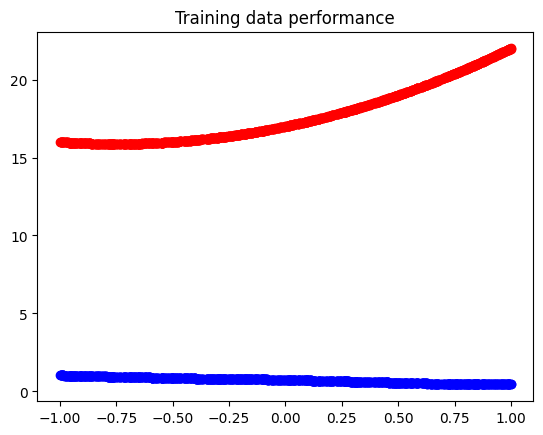

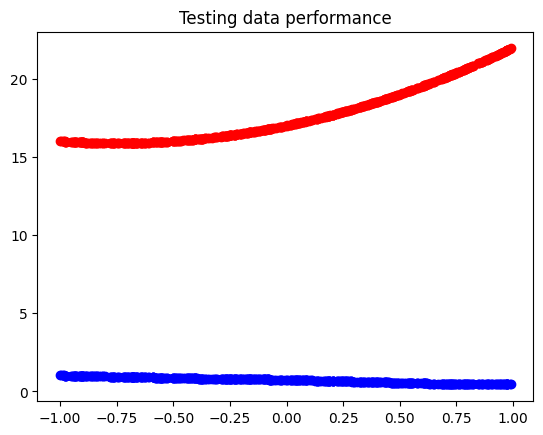

In [ ]:
with torch.no_grad():
    for batch_x, batch_y in train_data_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        pred_y = model(batch_x)
        
        batch_x = batch_x.to('cpu')
        batch_y = batch_y.to('cpu')
        pred_y = pred_y.to('cpu')
        # 畫出訓練資料答案分佈
        plt.scatter(batch_x, batch_y, color='red') 
        # 畫出訓練資料預測分佈
        plt.scatter(batch_x, pred_y, color='blue') 
        
    plt.title('Training data performance')
    plt.show()
    
    for batch_x, batch_y in test_data_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        pred_y = model(batch_x)
        
        batch_x = batch_x.to('cpu')
        batch_y = batch_y.to('cpu')
        pred_y = pred_y.to('cpu')
        # 畫出測試資料答案分佈
        plt.scatter(batch_x, batch_y, color='red') 
        # 畫出測試資料預測分佈
        plt.scatter(batch_x, pred_y, color='blue') 
    
    plt.title('Testing data performance')
    plt.show()

### 測試

深度學習模型在訓練時會自動計算梯度，若於分析模型在目標函數的表現時不想花多餘資源計算梯度可以使用 `with torch.no_grad():`：

### 儲存 & 載入模型

使用 `torch.save()` 配合 `model.state_dict()` 儲存訓練後的模型參數；
使用 `model.load_state_dict()` 配合 `torch.load()` 載入儲存的訓練過的模型參數。


In [ ]:
# 儲存 & 載入模型

# 儲存模型參數
# torch.save(model.state_dict(), './data/model.ckpt')    
# 載入模型參數
# model.load_state_dict(torch.load('./data/model.ckpt')) 

## 練習

### 練習 1：調整超參數

請試著更改前述範例中的超參數讓模型表現變好：

- 增加訓練次數 `n_epoch`
- 增大單一訓練資料次數 `batch_size`
- 增大隱藏層的維度 `hid_dim`
- 更改啟動函數 `F.relu`

### 練習 2：加深模型

請試著更改前述範例中的模型深度讓模型表現變好：

- 增加 1 個或多個 `nn.Linear`